In [61]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [4]:
train_label = train[:, 0]
train_label 

array([1., 0., 1., ..., 7., 6., 9.])

In [8]:
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

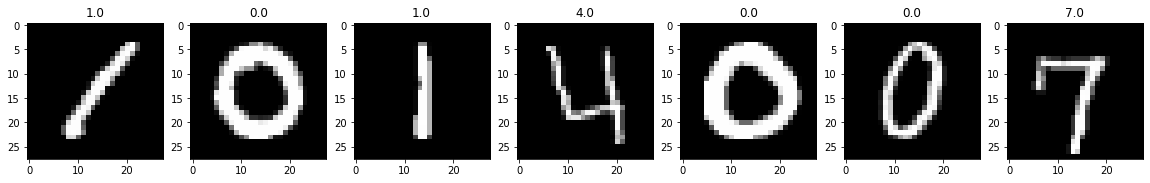

In [52]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:7], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [96]:
#сделаем предобработку данных, используя Standart Scaler

from sklearn.preprocessing import StandardScaler

X = train_img.reshape(-1, 28 * 28).astype(np.float32)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


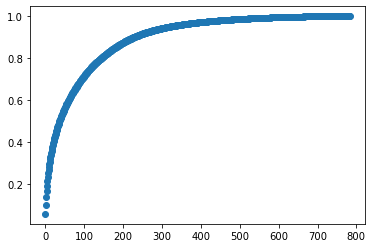

In [54]:
#определяем собственные вектора и значения для матрицы ковариации
cov = np.dot(X.T, X) / X.shape[0]
U, S, _ = np.linalg.svd(cov)
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [60]:
#зададим порог
S_thr = 0.85  

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))
print(f"n_comp={n_comp}")

#получим сжатое представление
Xrot_reduced = np.dot(X, U[:, :n_comp])

n_comp=179


In [57]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(train_label, Xrot_reduced, test_size=0.2, random_state=42)

In [64]:
#логистическая регрессия на данных после РСА
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_val)

In [65]:
#проверим точность на валидационных значениях
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       816
         1.0       0.96      0.98      0.97       909
         2.0       0.92      0.90      0.91       846
         3.0       0.91      0.87      0.89       937
         4.0       0.91      0.93      0.92       839
         5.0       0.84      0.87      0.85       702
         6.0       0.93      0.95      0.94       785
         7.0       0.93      0.92      0.93       893
         8.0       0.89      0.88      0.89       835
         9.0       0.90      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [105]:
#подготовим тестовые данные 
test = test_img.reshape(-1, 28 * 28).astype(np.float32)
test = scaler.transform(test)
test_reduced = np.dot(test, U[:, :n_comp])

In [106]:
pred_test = clf.predict(test_reduced ).astype(int)
pred_test[1]

0

In [107]:
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = pred_test
submission.to_csv('submission.csv', index = False)

In [108]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
